Wasserstein distance: 0.1160


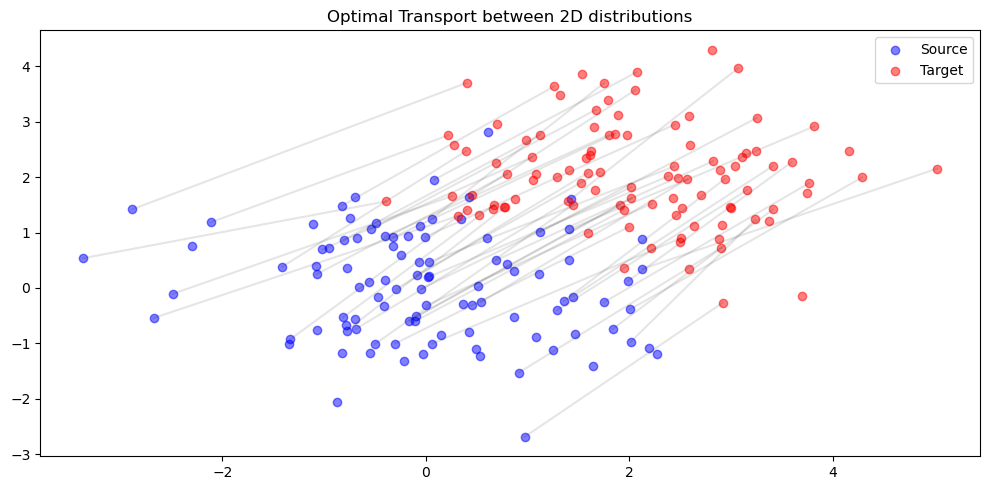

In [5]:
import numpy as np
import ot
import matplotlib.pyplot as plt

# Create two 2D distributions
n_samples = 100
n_features = 2

# Source and target distributions
source = np.random.randn(n_samples, n_features)
target = np.random.randn(n_samples, n_features) + np.array([2, 2])

# Uniform weights for both distributions
source_weights = np.ones(n_samples) / n_samples
target_weights = np.ones(n_samples) / n_samples

# Compute the cost matrix (squared Euclidean distance)
M = ot.dist(source, target)
M /= M.max()

# Compute the optimal transport
transport_plan = ot.emd(source_weights, target_weights, M)

# Calculate Wasserstein distance
wasserstein_distance = np.sum(transport_plan * M)
print(f"Wasserstein distance: {wasserstein_distance:.4f}")

# Visualize the distributions and some transport assignments
plt.figure(figsize=(10, 5))
plt.scatter(source[:, 0], source[:, 1], c='blue', alpha=0.5, label='Source')
plt.scatter(target[:, 0], target[:, 1], c='red', alpha=0.5, label='Target')

# Plot some transport assignments (just a subset for clarity)
for i in range(n_samples):
    for j in range(n_samples):
        if transport_plan[i, j] > 1e-8:  # Only plot significant transports
            if np.random.rand() < 0.5:  # Only plot 10% of connections for clarity
                plt.plot([source[i, 0], target[j, 0]], 
                         [source[i, 1], target[j, 1]], 
                         'k', alpha=0.1)

plt.legend()
plt.title('Optimal Transport between 2D distributions')
plt.tight_layout()
plt.show()